## **Data Importing**

#### Scraping data

In [ ]:
!pip install git+https://github.com/JustAnotherArchivist/snscrape.git #Installing snscrape (data mining package)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /tmp/pip-req-build-_0f1q8mg
  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git /tmp/pip-req-build-_0f1q8mg
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit 3dd9c28e31b8babeb2a187fbae994d9717ded168
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

def scrape_tweet(limit,query):
  """ 
  Download limit no. of tweets from twitter 
  with query and returns a dataframe
  """

  container = []

  for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(container) == limit:
        break
    else:
      if(tweet.lang == 'en'):
        container.append([tweet.user.username, tweet.date, tweet.rawContent])

  df = pd.DataFrame(container, columns=["User", "Date Created", "Tweet"])
  return df

In [ ]:
limit = 10000
query = "Facebook since:2022-01-01 until:2022-11-01"
tweets_df = scrape_tweet(limit,query)
tweets_df.to_csv('Tweets_Before_Layoff.csv', index=False)

In [ ]:
limit = 10000
query = "Facebook Layoffs since:2022-11-01 until:2023-04-01"
layoff_tweets_df = scrape_tweet(limit,query)
layoff_tweets_df.to_csv('Layoff_Tweets.csv', index=False)

In [ ]:
limit = 10000
query = "Facebook since:2022-11-01 until:2023-04-01 exclude:retweets exclude:replies"
latest_tweets_df = scrape_tweet(limit,query)
latest_tweets_df.to_csv('Latest_Tweets2.csv', index=False)

In [ ]:
limit = 100000
query = "Facebook since:2018-01-01 until:2023-04-01 exclude:retweets exclude:replies"
fb_training_df = scrape_tweet(limit,query)
fb_training_df.to_csv('fb_training_data.csv', index=False)

### Importing data

In [3]:
from google.colab import files
import io
import pandas as pd
 
""" 
Upload a CSV file from local device
and convert into a dataframe
"""
def upload():
  uploaded = files.upload()
  filename = next(iter(uploaded))
  df = pd.read_csv(io.BytesIO(uploaded[filename]),lineterminator='\n')
  return df

In [4]:
tweets_df = upload()
tweets_df.head()

Saving Fb_Training.csv to Fb_Training (1).csv


,User,Date Created,Tweet
0,eezypeezy,2018-01-01 23:59:58+00:00,#Twitter #Facebook #USA - - Watch this encoura...
1,avehhx3,2018-01-01 23:59:54+00:00,Who do these people on Facebook think is gonna...
2,CMVibe1,2018-01-01 23:59:54+00:00,I posted a new video to Facebook https://t.co/...
3,AngelVerdugoB,2018-01-01 23:59:45+00:00,Sigueme en Youtube https://t.co/RNGdKXwXgx Ins...
4,ritenag,2018-01-01 23:59:45+00:00,#Facebook’s Customer #Chat Plugin Is Coming To...


## **Data Preprocessing**

### Importing Libraries

In [70]:
## Data Manipulation 
import pandas as pd
import numpy as np

## Text Preprocessing
!pip install contractions
import contractions

import nltk
nltk.download('stopwords') #for stopwords
nltk.download('wordnet') #for WordNetLemmatizer
nltk.download('punkt') #for word_tokenize

import re
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

## Data Visualization 
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import style

## Machine Learning Libraries
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Checking shape of dataframe


In [7]:
tweets_df.shape

(105765, 3)

### Checking detailed information of dataframe

In [8]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105765 entries, 0 to 105764
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   User          105765 non-null  object
 1   Date Created  105765 non-null  object
 2   Tweet         105765 non-null  object
dtypes: object(3)
memory usage: 2.4+ MB


### Checking for null values in dataframe

In [9]:
tweets_df.isnull().sum()

User            0
Date Created    0
Tweet           0
dtype: int64

### Deleting unwanted columns

In [10]:
tweets_df.columns

Index(['User', 'Date Created', 'Tweet'], dtype='object')

In [11]:
tweets_df = tweets_df.drop(['User', 'Date Created'], axis=1)
tweets_df.head()

,Tweet
0,#Twitter #Facebook #USA - - Watch this encoura...
1,Who do these people on Facebook think is gonna...
2,I posted a new video to Facebook https://t.co/...
3,Sigueme en Youtube https://t.co/RNGdKXwXgx Ins...
4,#Facebook’s Customer #Chat Plugin Is Coming To...


### Analyzing tweets before cleaning

In [13]:
print(tweets_df['Tweet'].iloc[0],"\n")
print(tweets_df['Tweet'].iloc[1],"\n")
print(tweets_df['Tweet'].iloc[2],"\n")
print(tweets_df['Tweet'].iloc[3],"\n")
print(tweets_df['Tweet'].iloc[4],"\n")
print(tweets_df['Tweet'].iloc[5],"\n")
print(tweets_df['Tweet'].iloc[9995],"\n")
print(tweets_df['Tweet'].iloc[9996],"\n")
print(tweets_df['Tweet'].iloc[9997],"\n")
print(tweets_df['Tweet'].iloc[9998],"\n")
print(tweets_df['Tweet'].iloc[9999],"\n")

#Twitter #Facebook #USA - - Watch this encouraging video:
https://t.co/rE7zLUtZK8 https://t.co/vxrzPst3Qk 

Who do these people on Facebook think is gonna read their paragraphs of reflections for the new year??? 🤔 

I posted a new video to Facebook https://t.co/mPWNtFLKkW 

Sigueme en Youtube https://t.co/RNGdKXwXgx Instagram https://t.co/zxIG41kT3p Twitter @AngelVerdugoB y Facebook https://t.co/5heAWQaRwA https://t.co/Wys3SaCg5l 

#Facebook’s Customer #Chat Plugin Is Coming To A Website Near You ~ @villou 💻💬 https://t.co/CQXuz2I3V9 https://t.co/vwRinQa18I 

I posted a new video to Facebook https://t.co/bowIIZBNoC 

I don't know why Facebook thinks I care that someone added a post or shared a link on their page. Literally don't need an email about this, Facebook. If I want to see a Facebook update, I'll go on Facebook 

Busy mastering day. I’ll be playing some of these new tunes alongside the pull_up_selecta crew July 14th. See my Facebook page for more info. #dub #greenhouse #seriousv

### Data cleaning

1.   Lower casing
2.   Removal of Urls
3.   Removal of @tags and #
4.   Removal of punctuations
5.   Removal of emojis and symbols
6.   Removal of stop words
7.   Lemmatization






In [14]:
def data_cleaning(tweet):
  # covert all text to lowercase
  tweet = tweet.lower()

  # remove all urls
  tweet = re.sub('http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)

  # remove @ user tags and #
  tweet = re.sub('\@\w+|\#', '', tweet)

  # remove emojis
  regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
                           "]+", flags = re.UNICODE)
  regrex_pattern.sub('',tweet)

  # remove numbers
  tweet = ''.join(c for c in tweet if not c.isdigit())

  # resolving contractions
  expanded = []
  for word in tweet.split():
    expanded.append(contractions.fix(word))
  tweet =  ' '.join(expanded)

  # remove punctuations
  tweet = re.sub('[^\w\s]', '', tweet)

  # remove stop words
  tweet_tokens = word_tokenize(tweet)
  filtered_texts = [word for word in tweet_tokens if word not in stop_words]

  # lemmatizing
  lemma = WordNetLemmatizer()
  lemma_texts = (lemma.lemmatize(text, pos='a') for text in filtered_texts)

  return " ".join(lemma_texts)



In [15]:
tweets_df.Tweet = tweets_df['Tweet'].apply(data_cleaning)

### Analyzing tweets after cleaning

In [16]:
print(tweets_df['Tweet'].iloc[0],"\n")
print(tweets_df['Tweet'].iloc[1],"\n")
print(tweets_df['Tweet'].iloc[2],"\n")
print(tweets_df['Tweet'].iloc[3],"\n")
print(tweets_df['Tweet'].iloc[4],"\n")
print(tweets_df['Tweet'].iloc[5],"\n")
print(tweets_df['Tweet'].iloc[9995],"\n")
print(tweets_df['Tweet'].iloc[9996],"\n")
print(tweets_df['Tweet'].iloc[9997],"\n")
print(tweets_df['Tweet'].iloc[9998],"\n")
print(tweets_df['Tweet'].iloc[9999],"\n")

twitter facebook usa watch encouraging video 

people facebook think going read paragraphs reflections new year 

posted new video facebook 

sigueme en youtube instagram twitter facebook 

facebooks customer chat plugin coming website near 

posted new video facebook 

know facebook thinks care someone added post shared link page literally need email facebook want see facebook update go facebook 

busy mastering day playing new tunes alongside pull_up_selecta crew july th see facebook page info dub greenhouse seriousvibes montreal 

posted new video facebook 

posted new video facebook 

broncos facebook oates joins dce maroon recall 



### Checking for duplicate rows and deleting them

In [17]:
duplicate = tweets_df[tweets_df.duplicated()]
print(duplicate)

                                                    Tweet
5                               posted new video facebook
8                               posted new video facebook
10                              posted new video facebook
13                              posted new video facebook
14                              posted new video facebook
...                                                   ...
105722  storytelling facebook get leads sales signups ...
105727                              enough facebook today
105737             hey join us live youtube facebook live
105744  rock ages family live facebook youtube twitter...
105752  delighted followalso instagram facebook connem...

[22678 rows x 1 columns]


In [18]:
tweets_df = tweets_df.drop_duplicates('Tweet')

In [19]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83087 entries, 0 to 105764
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   83087 non-null  object
dtypes: object(1)
memory usage: 1.3+ MB


### Calculating polarity

In [20]:
def polarity(Tweet):
  return TextBlob(Tweet).sentiment.polarity

In [21]:
tweets_df['Polarity'] = tweets_df['Tweet'].apply(polarity)
tweets_df.head(10)

,Tweet,Polarity
0,twitter facebook usa watch encouraging video,0.000000
1,people facebook think going read paragraphs re...,0.136364
2,posted new video facebook,0.136364
3,sigueme en youtube instagram twitter facebook,0.000000
4,facebooks customer chat plugin coming website ...,0.100000
6,emergency facebook live,0.136364
7,facebook ads amp business building kick event ...,0.000000
9,thank support continue follow us facebook page...,0.033333
11,never heard facebook challenges get leads grow...,0.000000
12,could serious trouble facebook amp even know f...,-0.058333


### Labeling

In [22]:
def get_label(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [23]:
tweets_df['Sentiment'] = tweets_df['Polarity'].apply(get_label)
tweets_df.head()

,Tweet,Polarity,Sentiment
0,twitter facebook usa watch encouraging video,0.000000,Neutral
1,people facebook think going read paragraphs re...,0.136364,Positive
2,posted new video facebook,0.136364,Positive
3,sigueme en youtube instagram twitter facebook,0.000000,Neutral
4,facebooks customer chat plugin coming website ...,0.100000,Positive


### Saving the processed data

In [24]:
tweets_df.to_csv('Processed_tweets.csv',index=False)

### Plotting Word Cloud

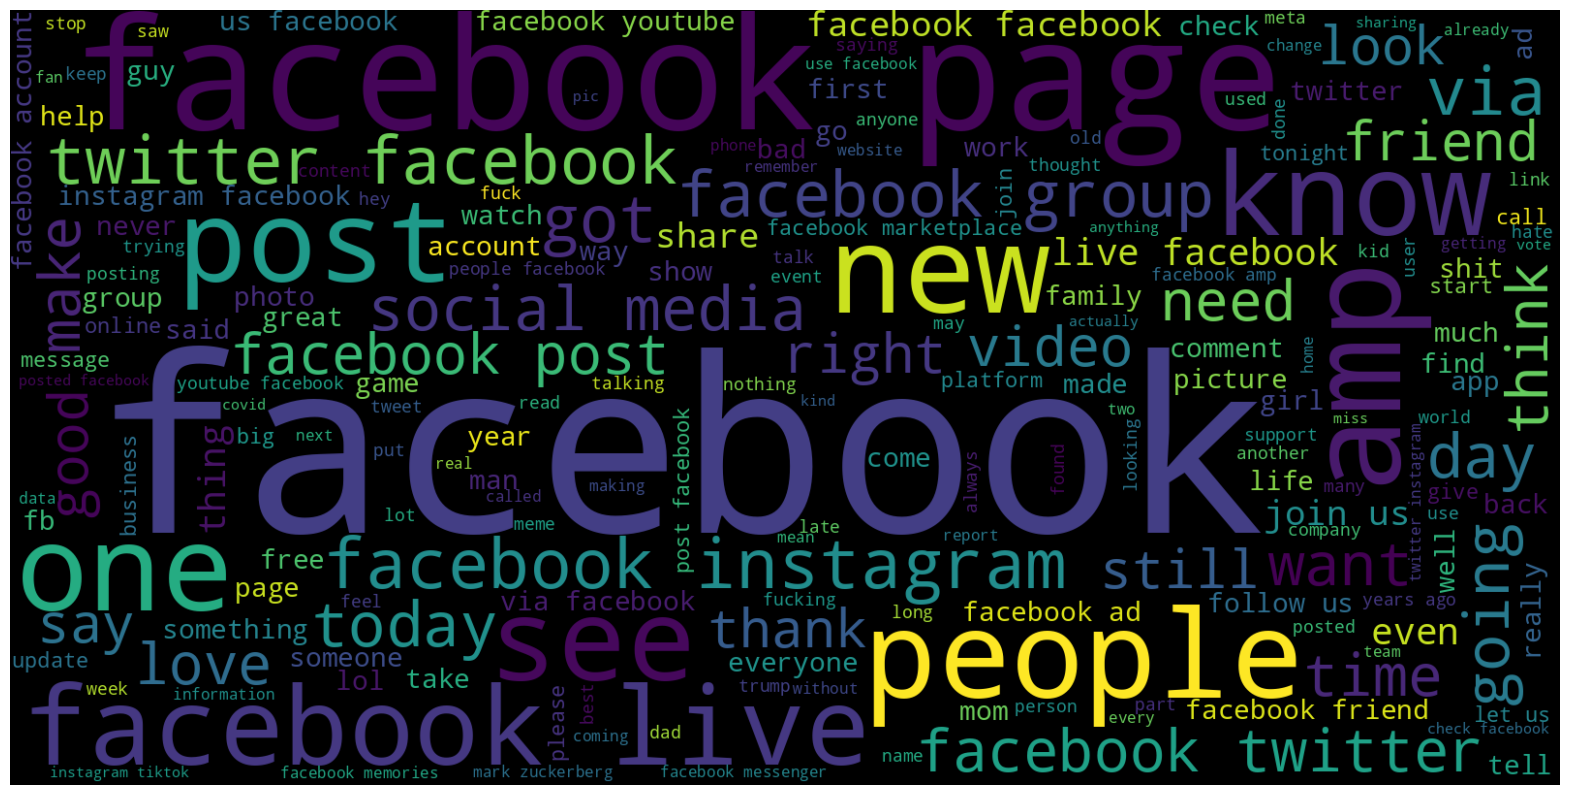

In [25]:
words = ' '.join([tweets for tweets in tweets_df['Tweet']])
plt.figure(figsize = (20,15))
wordCloud = WordCloud(width = 1600, height = 800, random_state = 21).generate(words)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()


#### Positive Tweets wordcloud

In [26]:
pos_tweets = tweets_df[tweets_df.Sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['Polarity'], ascending = False)
pos_tweets.head()

,Tweet,Polarity,Sentiment
73814,guys want join facebook group let awesome guys,1.0,Positive
99516,joe barber sings legendary andy williams music...,1.0,Positive
73322,carroll county facebook forever best ever,1.0,Positive
24275,playing wonderful world _ playing change like ...,1.0,Positive
2258,seen two galentinesday parties facebook today ...,1.0,Positive


In [27]:
pos_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36378 entries, 73814 to 30218
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tweet      36378 non-null  object 
 1   Polarity   36378 non-null  float64
 2   Sentiment  36378 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


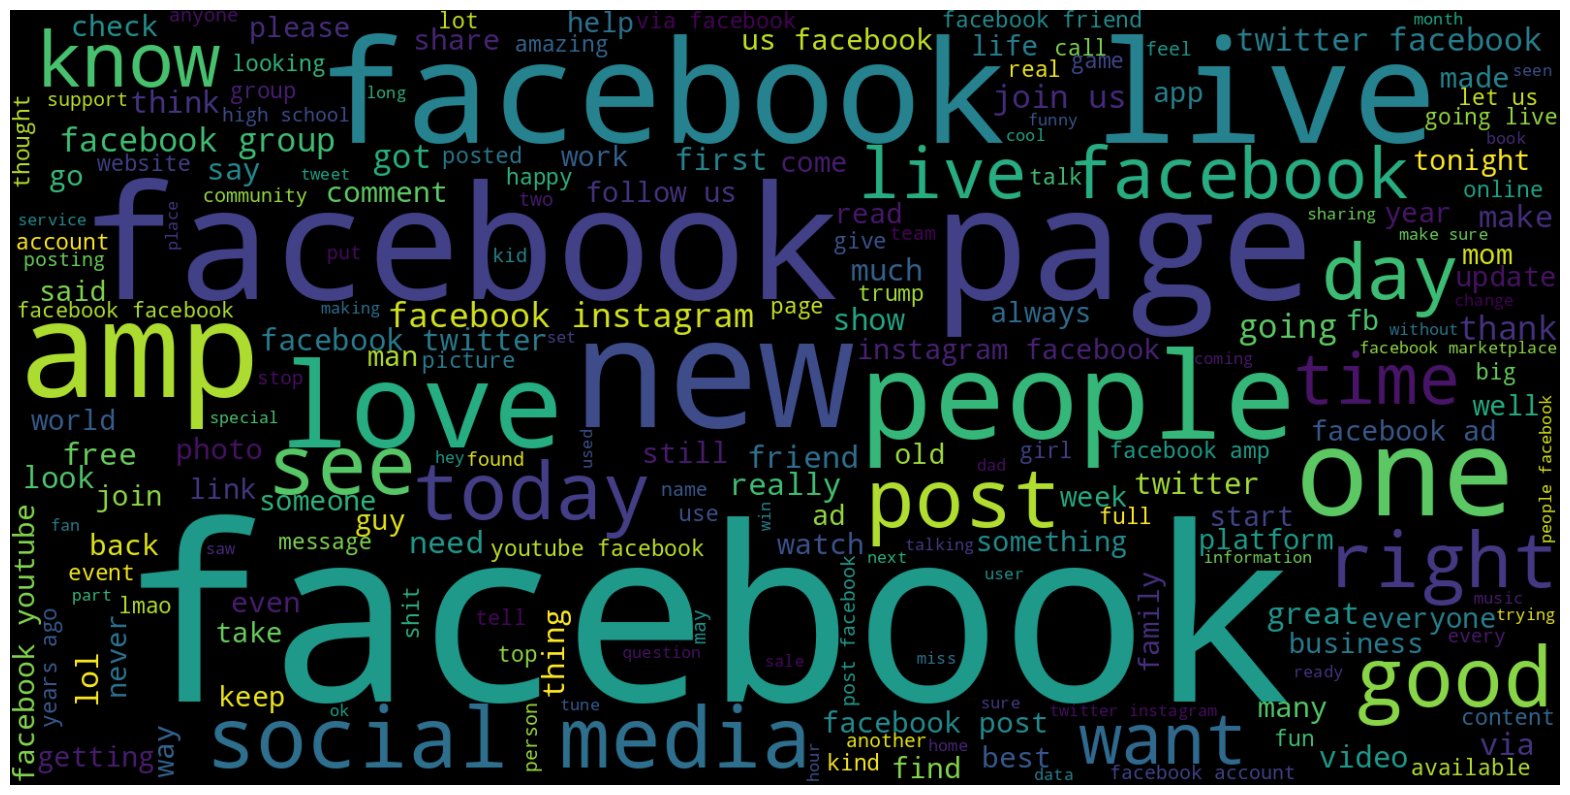

In [28]:
words = ' '.join([tweets for tweets in pos_tweets['Tweet']])
plt.figure(figsize = (20,15))
wordCloud = WordCloud(width = 1600, height = 800).generate(words)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

#### Negative Tweets wordcloud

In [29]:
neg_tweets = tweets_df[tweets_df.Sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['Polarity'], ascending = False)
neg_tweets.head()

,Tweet,Polarity,Sentiment
81228,deactivated facebook last august baby announce...,-6.938894e-18,Negative
48849,good crazy encourage military attack protester...,-6.938894e-18,Negative
6007,mornings maintenance taking long expected upda...,-6.938894e-18,Negative
80680,got banned facebook two days calling someone p...,-6.938894e-18,Negative
88743,love come twitter say fuck go jail reason dele...,-9.251859e-18,Negative


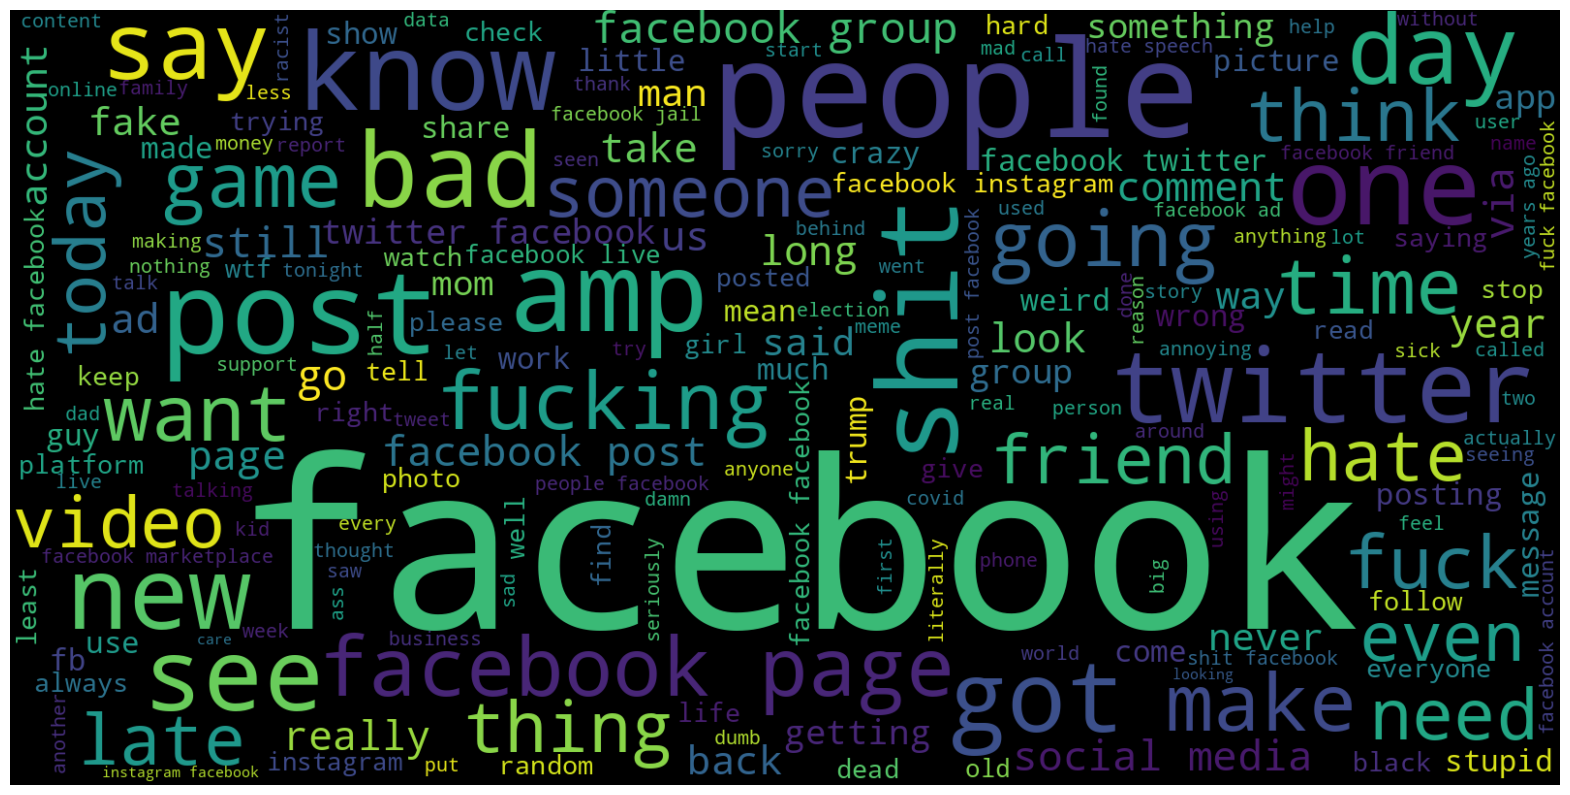

In [30]:
words = ' '.join([tweets for tweets in neg_tweets['Tweet']])
plt.figure(figsize = (20,15))
wordCloud = WordCloud(width = 1600, height = 800).generate(words)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

## **Machine learning**

### Data splitting

In [89]:
x_train, x_test, y_train, y_test = train_test_split(tweets_df["Tweet"], tweets_df["Sentiment"], test_size = 0.2, random_state = 50)

In [32]:
print(x_train,y_train)

95200                       world needs dependent facebook
60663    mark zuckerberg suspends president trumps face...
33748    ny attorney general lead antitrust investigati...
60879    tried lurking sisters facebook see dads curren...
74514       whole leesville get one facebook post cut uppp
                               ...                        
73886    hate following mama facebook think always girl...
78500    social chatter episode rayban stories facebook...
66089    facebook want add covid frame profile picture ...
37914                                   dawg facebook doin
28034    blocked bffs mom facebook could see pictures u...
Name: Tweet, Length: 66469, dtype: object 95200     Neutral
60663     Neutral
33748    Positive
60879     Neutral
74514    Positive
           ...   
73886     Neutral
78500    Positive
66089    Negative
37914     Neutral
28034    Negative
Name: Sentiment, Length: 66469, dtype: object


### Feature extraction

#### Tfidf vectorizer

In [90]:
vect = TfidfVectorizer(sublinear_tf=True).fit(x_train)

In [91]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 50 features:\n {}".format(feature_names[:50]))

Number of features: 70505

First 50 features:
 ['__' '___' '____' '_____' '______' '_______' '_________' '_____________'
 '_______________' '_________________' '_________________________'
 '___________________________' '______________________________'
 '_________________________________' '__________________________________'
 '_______________________________________' '___follow' '___want'
 '__isbetterthan__' '_a_maker' '_confessions' '_facebook_twitter_whats'
 '_hates_' '_iron' '_joseph' '_kiemy_' '_lockdown' '_not_'
 '_to__real_quick' '_ツ_' 'a_maker' 'aa' 'aaa' 'aaaa' 'aaaaaa'
 'aaaaaaaaaaaaa' 'aaaaaaaaaaaaaa' 'aaaaaaaaaaand' 'aaaaaaaaahhhhh'
 'aaaaaaaand' 'aaaaaand' 'aaaaaannnnd' 'aaaaaany' 'aaaahhggg' 'aaaand'
 'aaaba' 'aaai' 'aaall' 'aaarrrrr' 'aac']


In [94]:
x_train = vect.transform(x_train)

### Linear Support Vector Classifier (SVM)

In [95]:
SVM_model = LinearSVC()
SVM_model.fit(x_train, y_train)

LinearSVC()

In [96]:
SVM_pred = SVM_model.predict(vect.transform(x_test))
SVM_accur = accuracy_score(SVM_pred, y_test)
print("Test accuracy: {:.2f}%".format(SVM_accur*100))

Test accuracy: 95.10%


In [97]:
print(classification_report(y_test, SVM_pred))

              precision    recall  f1-score   support

    Negative       0.93      0.89      0.91      3358
     Neutral       0.96      0.98      0.97      5937
    Positive       0.96      0.96      0.96      7323

    accuracy                           0.95     16618
   macro avg       0.95      0.94      0.94     16618
weighted avg       0.95      0.95      0.95     16618



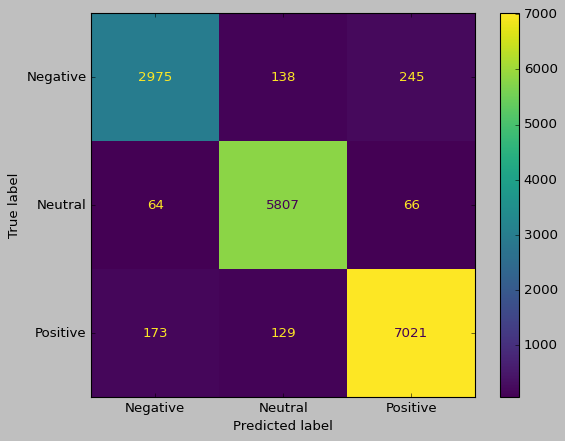

In [98]:
style.use('classic')
conmat = confusion_matrix(y_test, SVM_pred, labels = np.unique(SVM_pred))
graph = ConfusionMatrixDisplay(confusion_matrix = conmat, display_labels = np.unique(SVM_pred))
graph.plot()

### Logistic Regression

In [99]:
LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)

LogisticRegression()

In [100]:
LR_pred = LR_model.predict(vect.transform(x_test))
LR_accur = accuracy_score(LR_pred, y_test)
print("Test accuracy: {:.2f}%".format(LR_accur*100))

Test accuracy: 92.04%


In [101]:
print(classification_report(y_test, LR_pred))

              precision    recall  f1-score   support

    Negative       0.92      0.78      0.85      3358
     Neutral       0.90      0.98      0.94      5937
    Positive       0.94      0.94      0.94      7323

    accuracy                           0.92     16618
   macro avg       0.92      0.90      0.91     16618
weighted avg       0.92      0.92      0.92     16618



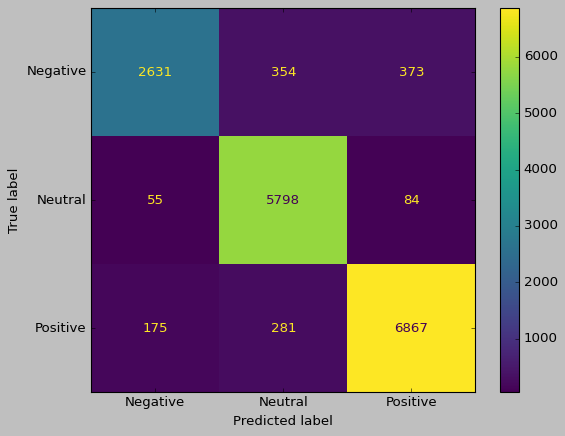

In [102]:
style.use('classic')
conmat = confusion_matrix(y_test, LR_pred, labels = np.unique(LR_pred))
graph = ConfusionMatrixDisplay(confusion_matrix = conmat, display_labels = np.unique(LR_pred))
graph.plot()

### MultinomialNB (Naive Bayes)

In [103]:
NB_model = MultinomialNB()
NB_model.fit(x_train, y_train)

MultinomialNB()

In [104]:
NB_pred = NB_model.predict(vect.transform(x_test))
NB_accur = accuracy_score(NB_pred, y_test)
print("Test accuracy: {:.2f}%".format(NB_accur*100))

Test accuracy: 62.87%


In [105]:
print(classification_report(y_test, NB_pred))

              precision    recall  f1-score   support

    Negative       0.97      0.22      0.35      3358
     Neutral       0.88      0.43      0.58      5937
    Positive       0.55      0.98      0.71      7323

    accuracy                           0.63     16618
   macro avg       0.80      0.54      0.54     16618
weighted avg       0.75      0.63      0.59     16618



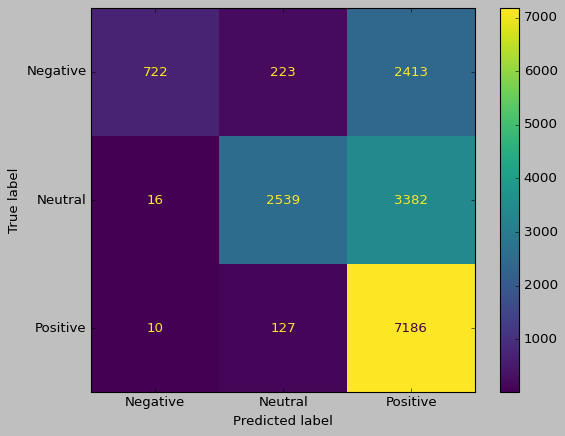

In [106]:
style.use('classic')
conmat = confusion_matrix(y_test, NB_pred, labels = np.unique(NB_pred))
graph = ConfusionMatrixDisplay(confusion_matrix = conmat, display_labels = np.unique(NB_pred))
graph.plot()

### Comparing the accuracy of all models

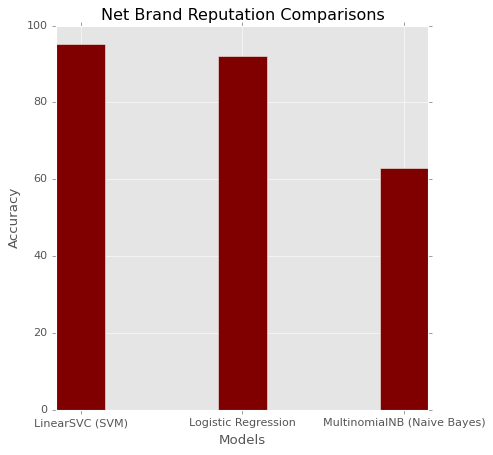

In [117]:
style.use('ggplot')
models = ['LinearSVC (SVM)', 'Logistic Regression', 'MultinomialNB (Naive Bayes)']
values = np.array([SVM_accur,LR_accur,NB_accur])
accur = values*100
fig = plt.figure(figsize = (6, 6))
plt.bar(models, accur, color ='maroon', width = 0.3)
 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Net Brand Reputation Comparisons")
plt.show()

### Saving the best performing model

In [107]:
import pickle
filename = 'final_trained_model.sav'
pickle.dump(SVM_model, open(filename, 'wb')) 